In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
_include_('curriculum_vqa')
import sys
import os
from cvqa import datasets, models, trainers, viz

data_bin = f'{DEV_HOME}/curriculum_vqa/data-bin'
clevr_root = f'{data_bin}/CLEVR_mini_6'

In [3]:
ds_train, ds_dev = datasets.CLEVR.load_train_dev(clevr_root, struct_viz=True)

100%|██████████| 3600/3600 [00:00<00:00, 5034.29it/s]


In [4]:
ds_train.samples[0]

{'image_index': 18844,
 'program': [{'inputs': [], 'function': 'scene', 'value_inputs': []},
  {'inputs': [0], 'function': 'filter_size', 'value_inputs': ['small']},
  {'inputs': [1], 'function': 'unique', 'value_inputs': []},
  {'inputs': [2], 'function': 'same_shape', 'value_inputs': []},
  {'inputs': [3], 'function': 'count', 'value_inputs': []}],
 'question_index': 188436,
 'image_filename': 'CLEVR_train_018844.png',
 'question_family_index': 43,
 'split': 'train',
 'answer': '1',
 'question': 'What number of other objects are the same shape as the small object?',
 'prompt': 'What number of other objects are the same shape as the small object?',
 'target': '1',
 'image_path': 'images/CLEVR_train_018844.png',
 'viz_rep': {'objects': [{'tokens': 'large blue metal sphere',
    'numerics': [2.592627763748169, 1.9569541215896606, 0.699999988079071]},
   {'tokens': 'large gray metal cylinder',
    'numerics': [2.803412914276123, 0.13670913875102997, 0.699999988079071]},
   {'tokens': 'sm

[epoch=4, steps=462, train_acc=0.78, dev_acc=0.78] loss: 0.316: 100%|██████████| 5/5 [00:16<00:00,  3.26s/it]


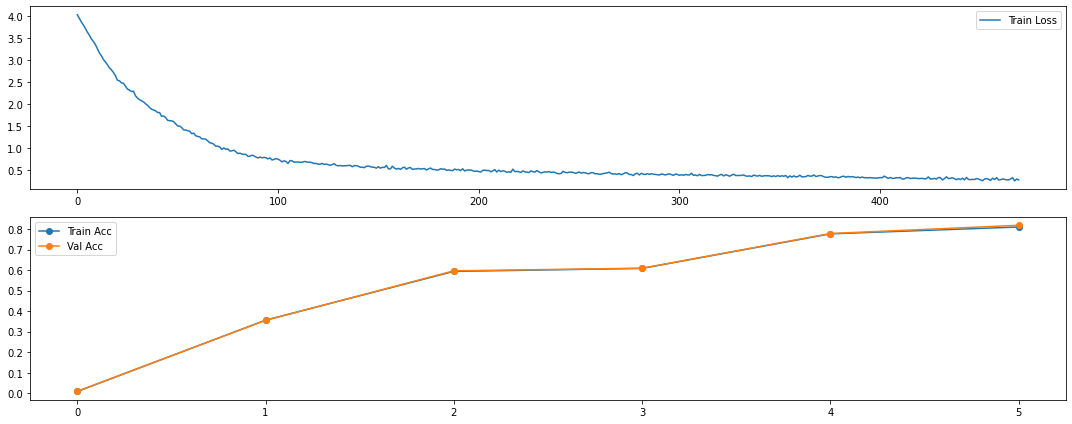

In [8]:
import random
import numpy as np
import torch
from cvqa.model_dev.lstms import Seq2SeqLSTM

seed = 1
random.seed(1)
np.random.seed(seed)
torch.manual_seed(seed)

trainer = trainers.VQATrainer(pred_target='target_program_out', ignore_index=ds_train.vocab.pad_index)

model_args = Seq2SeqLSTM.args(ds_train.vocab, ds_train.programs_vocab)
model = Seq2SeqLSTM(model_args)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

train_metrics = trainer.train(model, ds_train, ds_dev, optimizer, num_epochs=5)

viz.plot_training(*train_metrics)

In [9]:
ds_dev.debug_mode = True
s = next(iter(torch.utils.data.DataLoader(ds_dev, shuffle=True)))
logits, y_pred = model.forward_test(s)
prog_vocab = ds_train.programs_vocab

print(s['debug_info']['prompt_text'])
print(s['debug_info']['program_str'])
prog_vocab.string(y_pred).replace(' ', '')

['The gray matte object is what shape?']
["query_shape(scene().filter_color('gray').filter_material('rubber').unique())"]


"query_shape('rubber''cube'().filter_color('red').unique())<pad><pad><pad><pad><pad>"